<img src='http://imgur.com/1ZcRyrc.png' style='float: left; margin: 20px; height: 55px'>

# Capstone: A Lindy Hop Classifier

# Imports

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

## 1. Load Files

In [2]:
df_open = pd.read_csv('./swingout_open.csv')
df_closed = pd.read_csv('./swingout_closed.csv')

In [3]:
df_open.head()

,person,recording_id,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,1.0,1.0,0.393099,0.449089,0.000000,0.000000,0.388202,0.443077,0.0,0.0,...,0.369436,0.616369,0.407807,0.686732,0.388440,0.697970,0.398472,0.761468,0.381419,0.783450
1,1.0,1.0,0.391529,0.447817,0.000000,0.000000,0.386853,0.441349,0.0,0.0,...,0.366962,0.615275,0.404229,0.684587,0.385819,0.696306,0.392771,0.758631,0.380829,0.782492
2,1.0,1.0,0.389190,0.445751,0.388239,0.439588,0.384182,0.439379,0.0,0.0,...,0.365964,0.615609,0.404024,0.689277,0.383067,0.692341,0.371242,0.755467,0.382889,0.783826
3,1.0,1.0,0.388117,0.447584,0.386858,0.440985,0.383391,0.440839,0.0,0.0,...,0.363434,0.615451,0.399743,0.691196,0.383210,0.690410,0.365151,0.753961,0.380189,0.781600
4,1.0,1.0,0.386532,0.449116,0.385829,0.442579,0.382170,0.441805,0.0,0.0,...,0.361667,0.614660,0.386282,0.691418,0.385349,0.692073,0.356388,0.749475,0.379684,0.779864


In [4]:
df_closed.head()

,person,recording_id,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,1.0,1.0,0.293628,0.470390,0.000000,0.000000,0.290604,0.463198,0.0,0.0,...,0.280527,0.593423,0.311007,0.666218,0.284837,0.669282,0.300529,0.736471,0.275658,0.746183
1,1.0,1.0,0.294179,0.462650,0.000000,0.000000,0.291382,0.455672,0.0,0.0,...,0.281125,0.589499,0.311133,0.662798,0.285688,0.667385,0.300320,0.736599,0.275838,0.745716
2,1.0,1.0,0.293070,0.461019,0.000000,0.000000,0.290172,0.453839,0.0,0.0,...,0.278979,0.586913,0.311788,0.661116,0.283659,0.664596,0.301151,0.733907,0.275769,0.742755
3,1.0,1.0,0.293171,0.461171,0.000000,0.000000,0.290135,0.453966,0.0,0.0,...,0.279331,0.586728,0.311602,0.661882,0.283602,0.664693,0.301083,0.734333,0.276479,0.743173
4,1.0,1.0,0.291927,0.462172,0.293929,0.455049,0.288730,0.455220,0.0,0.0,...,0.278336,0.588350,0.311441,0.661433,0.283094,0.664453,0.301040,0.733071,0.276074,0.741245


In [5]:
print(df_open.shape[0])
print(df_closed.shape[0])

2902
2460


In [6]:
# converting float to int for categorical variables
columns = ['person','recording_id']
dfs = [df_open,df_closed]

for df in dfs:
    for col in columns:
        df[col] = df[col].astype(int)

In [7]:
df_open = df_open.replace(0, np.nan)
df_closed = df_closed.replace(0, np.nan)

In [8]:
df_open.isna().sum()

person                 0
recording_id           0
nose_x               723
nose_y               723
left_eye_x          1998
left_eye_y          1998
right_eye_x          714
right_eye_y          714
left_ear_x          2417
left_ear_y          2417
right_ear_x           96
right_ear_y           96
left_shoulder_x       32
left_shoulder_y       32
right_shoulder_x       0
right_shoulder_y       0
left_elbow_x         589
left_elbow_y         589
right_elbow_x         20
right_elbow_y         20
left_wrist_x         736
left_wrist_y         736
right_wrist_x         82
right_wrist_y         82
left_hip_x             0
left_hip_y             0
right_hip_x            0
right_hip_y            0
left_knee_x            1
left_knee_y            1
right_knee_x           0
right_knee_y           0
left_ankle_x           6
left_ankle_y           6
right_ankle_x          0
right_ankle_y          0
dtype: int64

In [9]:
df_closed.isna().sum()

person                 0
recording_id           0
nose_x               362
nose_y               362
left_eye_x          1958
left_eye_y          1958
right_eye_x          423
right_eye_y          423
left_ear_x          1937
left_ear_y          1937
right_ear_x          270
right_ear_y          270
left_shoulder_x       24
left_shoulder_y       24
right_shoulder_x       0
right_shoulder_y       0
left_elbow_x         976
left_elbow_y         976
right_elbow_x         98
right_elbow_y         98
left_wrist_x        1012
left_wrist_y        1012
right_wrist_x        189
right_wrist_y        189
left_hip_x             0
left_hip_y             0
right_hip_x            0
right_hip_y            0
left_knee_x            0
left_knee_y            0
right_knee_x           0
right_knee_y           0
left_ankle_x           1
left_ankle_y           1
right_ankle_x          0
right_ankle_y          0
dtype: int64

In [10]:
def check_rows(df):
    grouped = pd.DataFrame(df.groupby('recording_id')['person'].unique())
    rows_to_check = []

    for rec_id, persons in grouped.iterrows():
        if len(persons[0])!=2 or (persons[0][1] != 2):
            rows_to_check.append(rec_id)
    return rows_to_check
            
check_open = check_rows(df_open)
check_closed = check_rows(df_closed)

In [11]:
print(check_open)
print(check_closed)

[3, 4, 6, 7, 8, 11, 15, 21, 22, 23, 25, 26, 27, 28]
[1, 2, 8, 9, 20, 22]


# Cleaning Swingout in Open:

In [12]:
grouped_open = df_open.groupby('recording_id')

recordings = {}  # Create a dictionary to store the grouped DataFrames

for recording_id, group_df in grouped_open:
        recordings[recording_id] = group_df

Text(0.5, 1.0, 'Recording 9')

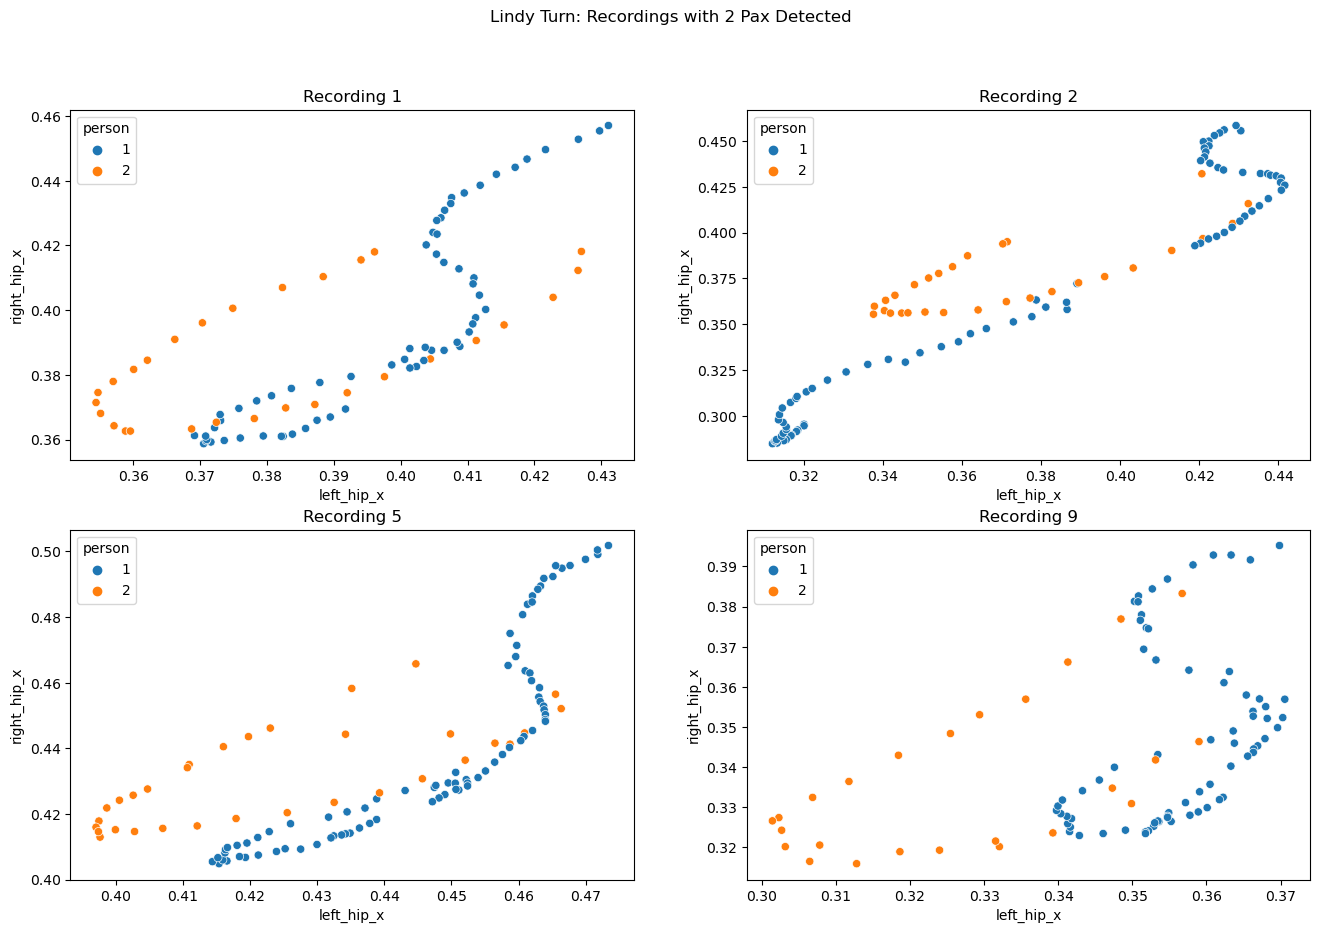

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

fig.suptitle("Lindy Turn: Recordings with 2 Pax Detected")

sns.scatterplot(data = recordings[1], x='left_hip_x', y = 'right_hip_x', hue='person',palette='tab10',ax=axes[0,0])
axes[0,0].set_title('Recording 1')

sns.scatterplot(data = recordings[2], x='left_hip_x', y = 'right_hip_x', hue='person',palette='tab10',ax=axes[0,1])
axes[0,1].set_title('Recording 2')

sns.scatterplot(data = recordings[5], x='left_hip_x', y = 'right_hip_x', hue='person',palette='tab10',ax=axes[1,0])
axes[1,0].set_title('Recording 5')

sns.scatterplot(data = recordings[9], x='left_hip_x', y = 'right_hip_x', hue='person',palette='tab10',ax=axes[1,1])
axes[1,1].set_title('Recording 9')


Text(0.5, 1.0, 'Recording 7')

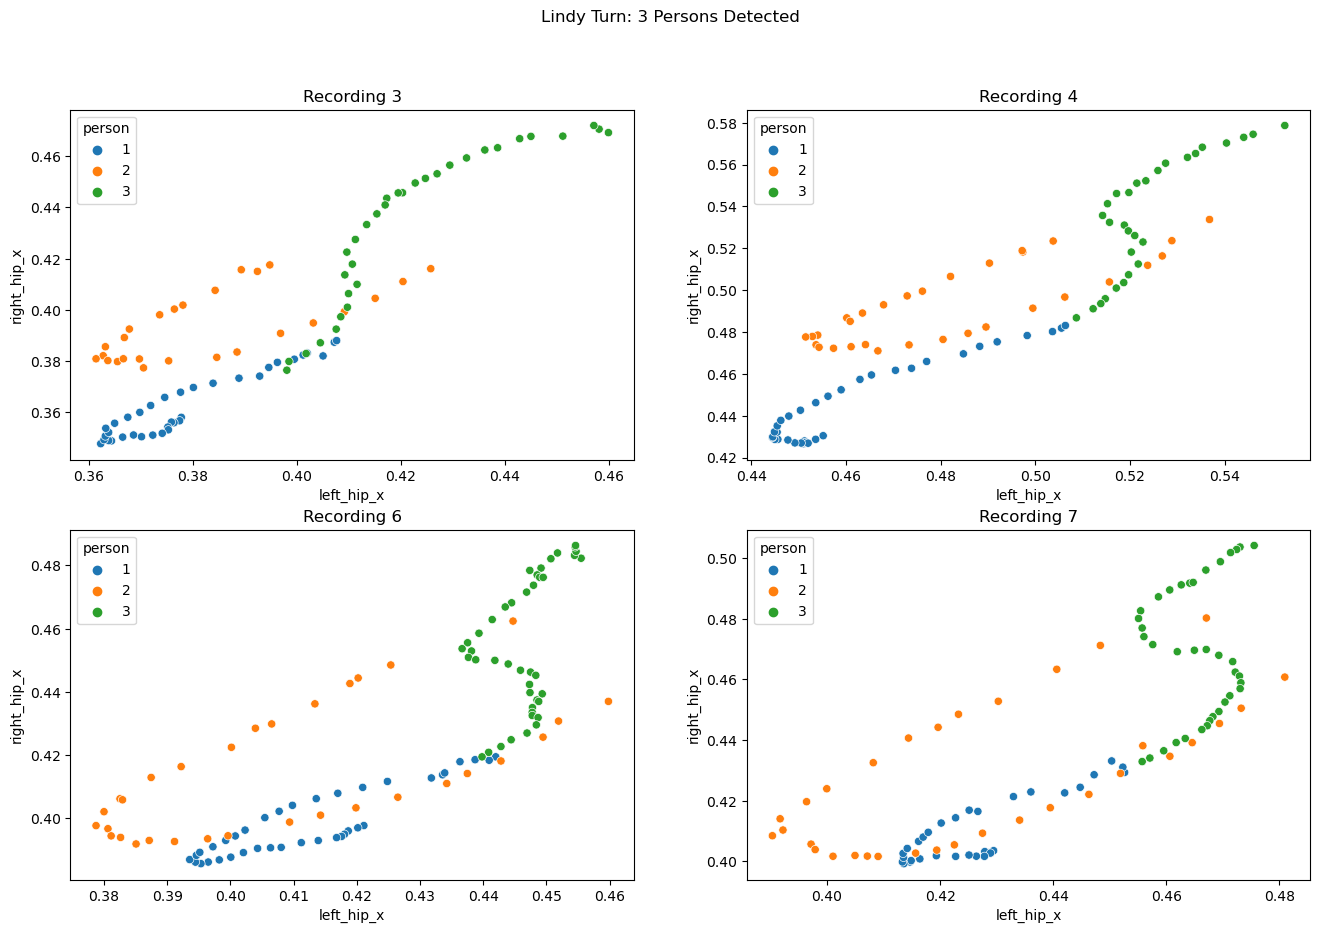

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

fig.suptitle("Lindy Turn: 3 Persons Detected")

sns.scatterplot(data = recordings[3], x='left_hip_x', y = 'right_hip_x', hue='person',palette='tab10',ax=axes[0,0])
axes[0,0].set_title('Recording 3')

sns.scatterplot(data = recordings[4], x='left_hip_x', y = 'right_hip_x', hue='person',palette='tab10',ax=axes[0,1])
axes[0,1].set_title('Recording 4')

sns.scatterplot(data = recordings[6], x='left_hip_x', y = 'right_hip_x', hue='person',palette='tab10',ax=axes[1,0])
axes[1,0].set_title('Recording 6')

sns.scatterplot(data = recordings[7], x='left_hip_x', y = 'right_hip_x', hue='person',palette='tab10',ax=axes[1,1])
axes[1,1].set_title('Recording 7')


Text(0.5, 1.0, 'Recording 28: 4 Pax Detected')

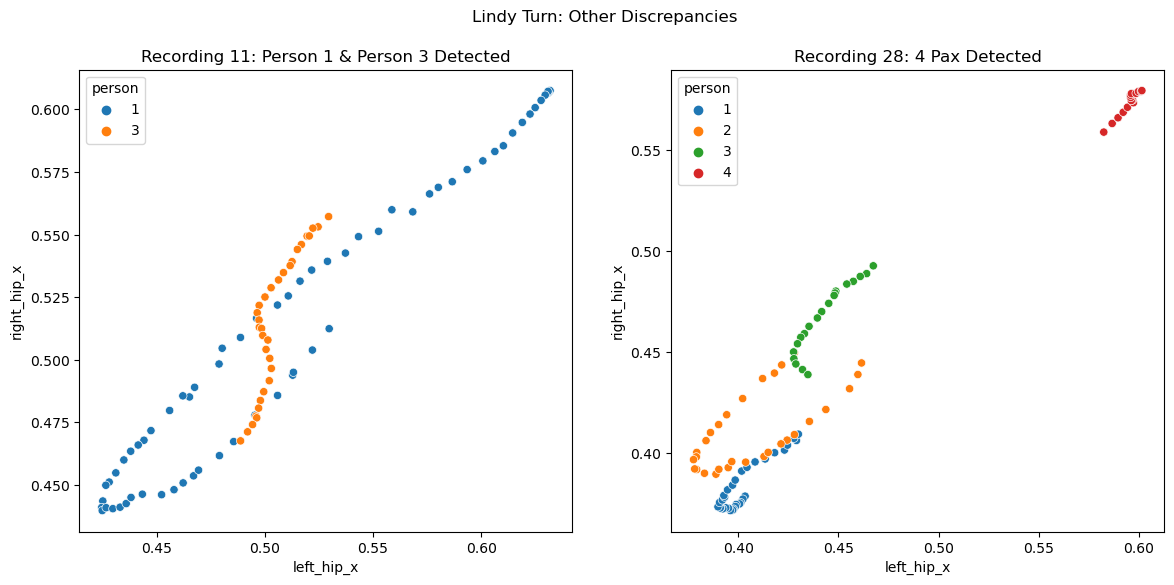

In [15]:
fig, axes = plt.subplots(1,2, figsize=(14, 6))

fig.suptitle("Lindy Turn: Other Discrepancies")

sns.scatterplot(data = recordings[11], x='left_hip_x', y = 'right_hip_x', hue='person',palette='tab10',ax=axes[0])
axes[0].set_title('Recording 11: Person 1 & Person 3 Detected')

sns.scatterplot(data = recordings[28], x='left_hip_x', y = 'right_hip_x', hue='person',palette='tab10',ax=axes[1])
axes[1].set_title('Recording 28: 4 Pax Detected')


In [18]:
# Replace Person 3 as Person 1
# Replace Person 4 as Person 1
# Assign Person 1 as Follow, Person 2 as Lead
# Drop Recording 11

df_open['person'] = df_open['person'].replace(3, 1)
df_open['person'] = df_open['person'].replace(4, 1)

clean_open = df_open[df_open['recording_id'] != 11]
clean_open['person'] = clean_open['person'].map({1: 'follow', 2: 'lead'})

/var/folders/jz/qcwfx1nj09v3vnhrlf56x74c0000gn/T/ipykernel_54441/2406815876.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_open['person'] = clean_open['person'].map({1: 'follow', 2: 'lead'})


# Cleaning Swingout in Closed:

In [19]:
grouped_closed = df_closed.groupby('recording_id')

recordings_closed = {}  # Create a dictionary to store the grouped DataFrames

for recording_id, df in grouped_closed:
        recordings_closed[recording_id] = df

In [20]:
print(check_closed)

[1, 2, 8, 9, 20, 22]


Text(0.5, 1.0, 'Recording 6')

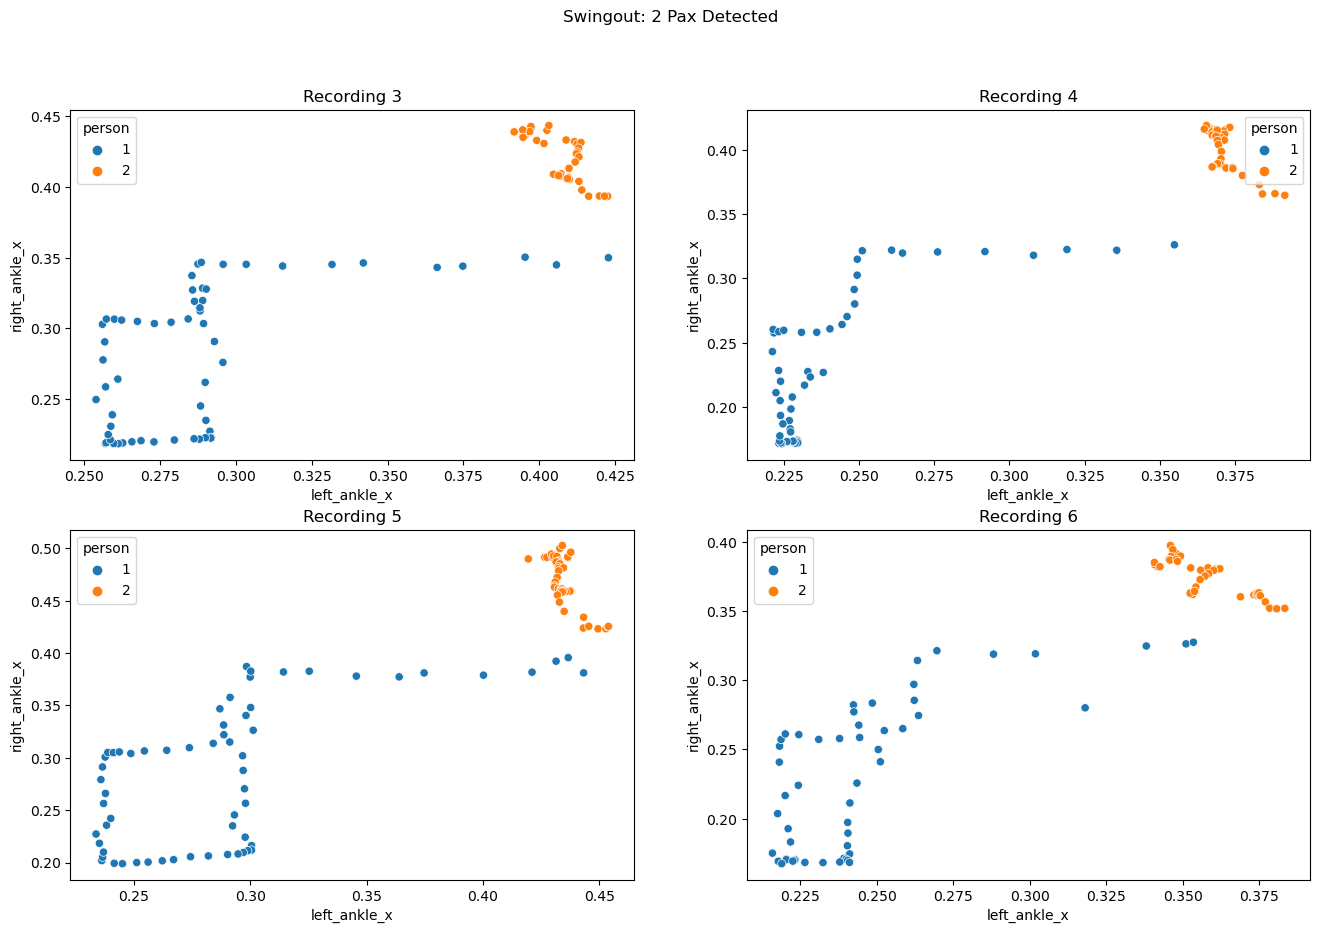

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

fig.suptitle("Swingout: 2 Pax Detected")

sns.scatterplot(data = recordings_closed[3], x='left_ankle_x', y = 'right_ankle_x', hue='person',palette='tab10',ax=axes[0,0])
axes[0,0].set_title('Recording 3')

sns.scatterplot(data = recordings_closed[4], x='left_ankle_x', y = 'right_ankle_x', hue='person',palette='tab10',ax=axes[0,1])
axes[0,1].set_title('Recording 4')

sns.scatterplot(data = recordings_closed[5], x='left_ankle_x', y = 'right_ankle_x', hue='person',palette='tab10',ax=axes[1,0])
axes[1,0].set_title('Recording 5')

sns.scatterplot(data = recordings_closed[6], x='left_ankle_x', y = 'right_ankle_x', hue='person',palette='tab10',ax=axes[1,1])
axes[1,1].set_title('Recording 6')

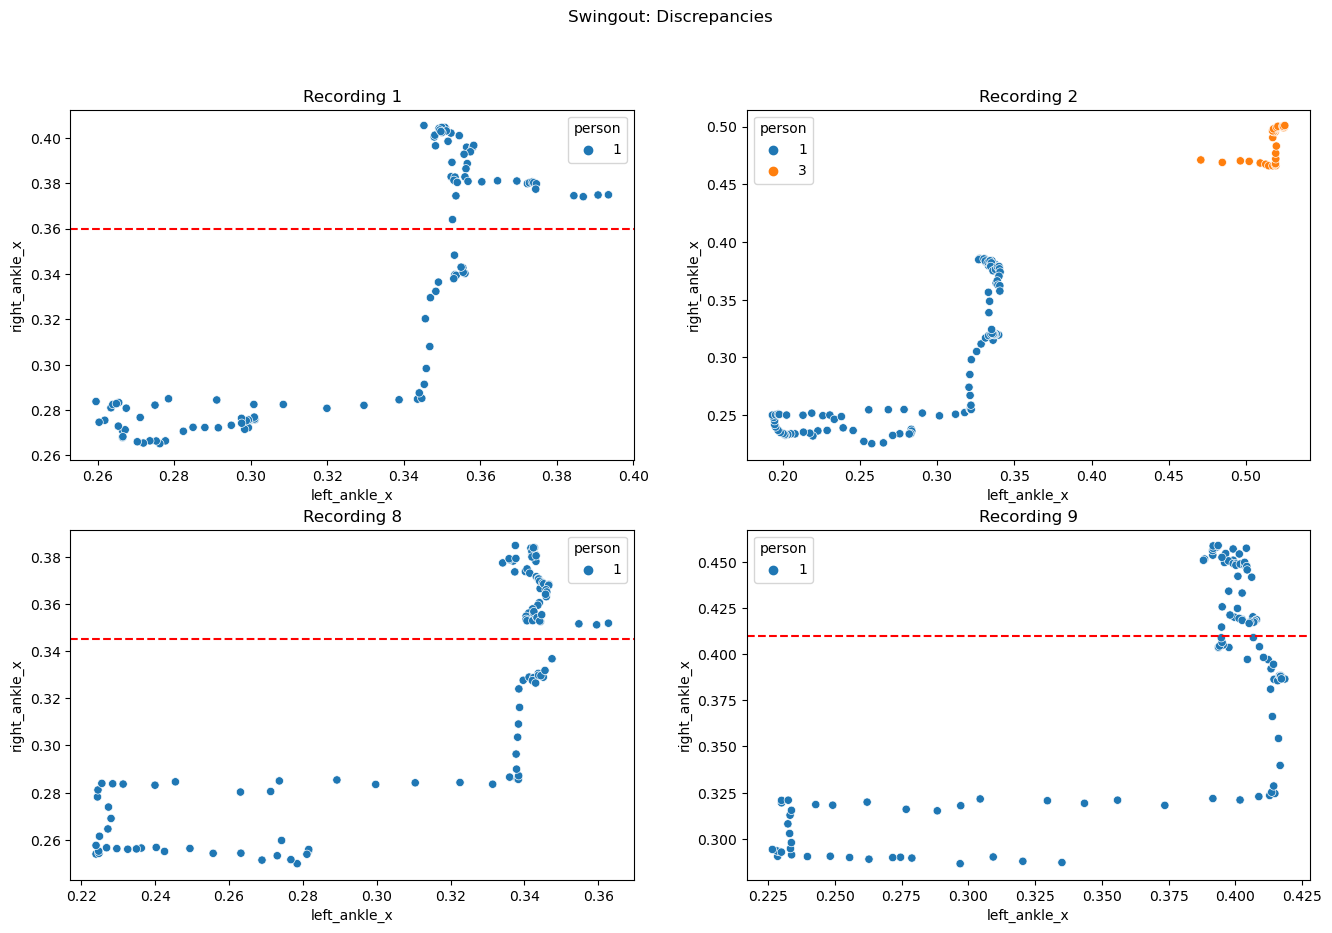

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

fig.suptitle("Swingout: Discrepancies")

sns.scatterplot(data = recordings_closed[1], x='left_ankle_x', y = 'right_ankle_x', hue='person',palette='tab10',ax=axes[0,0])
axes[0,0].set_title('Recording 1')
axes[0, 0].axhline(y=0.36, color='red', linestyle='--', label='Horizontal Line')

sns.scatterplot(data = recordings_closed[2], x='left_ankle_x', y = 'right_ankle_x', hue='person',palette='tab10',ax=axes[0,1])
axes[0,1].set_title('Recording 2')

sns.scatterplot(data = recordings_closed[8], x='left_ankle_x', y = 'right_ankle_x', hue='person',palette='tab10',ax=axes[1,0])
axes[1,0].set_title('Recording 8')
axes[1,0].axhline(y=0.345, color='red', linestyle='--', label='Horizontal Line')

sns.scatterplot(data = recordings_closed[9], x='left_ankle_x', y = 'right_ankle_x', hue='person',palette='tab10',ax=axes[1,1])
axes[1,1].set_title('Recording 9')
axes[1,1].axhline(y=0.41, color='red', linestyle='--', label='Horizontal Line')

In [25]:
# Replace Person 3 as Person 2
df_closed['person'] = df_closed['person'].replace(3, 2)

In [26]:
# Drop 1, 2, 20, 22
cols_to_drop = [1, 2, 20, 22]
clean_closed = df_closed[~df_closed['recording_id'].isin(cols_to_drop)]

In [27]:
clean_open.fillna(0)
clean_closed.fillna(0)

,person,recording_id,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
239,1,3,0.329820,0.475943,0.000000,0.000000,0.325079,0.471846,0.0,0.0,...,0.310601,0.651013,0.320431,0.731872,0.332333,0.726988,0.289000,0.804573,0.328434,0.819380
240,1,3,0.326019,0.475764,0.000000,0.000000,0.320719,0.471544,0.0,0.0,...,0.312656,0.663055,0.316978,0.734343,0.328505,0.731659,0.290192,0.806014,0.327842,0.818598
241,1,3,0.323277,0.474080,0.000000,0.000000,0.318157,0.470467,0.0,0.0,...,0.301921,0.652346,0.313251,0.728859,0.323160,0.724709,0.289033,0.806109,0.319684,0.817830
242,1,3,0.320563,0.469779,0.000000,0.000000,0.315512,0.466171,0.0,0.0,...,0.297116,0.647951,0.310134,0.724060,0.315672,0.720659,0.289325,0.803227,0.303404,0.809824
243,1,3,0.318608,0.466351,0.000000,0.000000,0.313636,0.462930,0.0,0.0,...,0.291698,0.641811,0.310700,0.710592,0.311604,0.715599,0.292901,0.798356,0.290705,0.805033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,2,23,0.381364,0.422299,0.380782,0.414774,0.376505,0.413443,0.0,0.0,...,0.354390,0.607630,0.400168,0.689956,0.375936,0.696787,0.392014,0.783768,0.366571,0.799719
2456,2,23,0.378920,0.424278,0.378163,0.416424,0.374078,0.415241,0.0,0.0,...,0.350455,0.607697,0.397979,0.688747,0.370996,0.699792,0.393666,0.784651,0.356743,0.795268
2457,2,23,0.375389,0.427176,0.374938,0.419990,0.370685,0.418286,0.0,0.0,...,0.347853,0.610907,0.394638,0.696364,0.364978,0.704441,0.398340,0.789845,0.354258,0.802312
2458,2,23,0.372535,0.429289,0.000000,0.000000,0.367875,0.420751,0.0,0.0,...,0.344294,0.615567,0.392201,0.698619,0.361366,0.707853,0.399948,0.790130,0.353840,0.803765


In [28]:
# Assign Person 1 as Follow, Person 2 as Lead
clean_closed['person'] = clean_closed['person'].map({1: 'follow', 2: 'lead'})

/var/folders/jz/qcwfx1nj09v3vnhrlf56x74c0000gn/T/ipykernel_54441/1905538328.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_closed['person'] = clean_closed['person'].map({1: 'follow', 2: 'lead'})


In [29]:
clean_open.to_csv('clean_open.csv',index=False)
clean_closed.to_csv('clean_closed.csv',index=False)